# principle Component Analysis

In [1]:
import pandas as pd 
import numpy as np

In [2]:
uni = pd.read_csv("C:\\Users\\HP\\Desktop\\Universities_Clustering.csv")

In [3]:
uni.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [4]:
uni.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
Univ        25 non-null object
SAT         25 non-null int64
Top10       25 non-null int64
Accept      25 non-null int64
SFRatio     25 non-null int64
Expenses    25 non-null int64
GradRate    25 non-null int64
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [7]:
# Considering only numerical data 
uni.data = uni.ix[:,1:]
uni.data.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [8]:
# Converting into numpy array
UNI = uni.data.values
UNI

array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

In [11]:
# Normalizing the numerical data 
uni_normal = scale(UNI)
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [10]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(uni_normal)

In [12]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var
pca.components_[0]

array([-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
       -0.37940403])

In [13]:
# Cumulative variance 

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

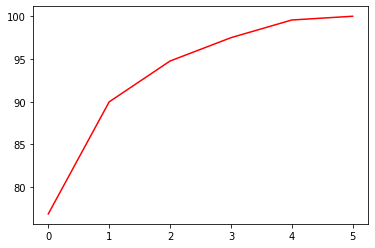

In [14]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")